##### TASK 2 - LEVEL BEGINNER
##### Predicting the Optimum number of Clusters and Visualizing Results In the dataset "Iris"
##### GRIPSEPTEMBER23 
##### Laiba Masood 


In [31]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

In [7]:
# Loading the Iris Dataset, using a function of sklearn datasets module 

iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(data)

# Iris is a well behaved data set so we don't need standardization

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


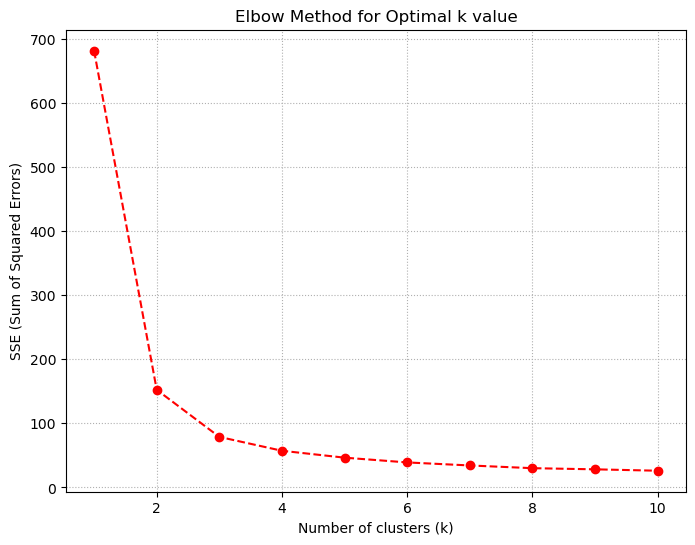

In [23]:
#Using elbow method to find the optimum cluster

sse = []  # Squared sum errors

#k-means++ is a way to spread out centroids to avoid suboptimal convergence
#giving max iterations incase of no convergence, the algo should stop

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(data)
    sse.append(kmeans.inertia_) #intertia === sse

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--', color="red")
plt.title('Elbow Method for Optimal k value')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(linestyle="dotted")
plt.show()


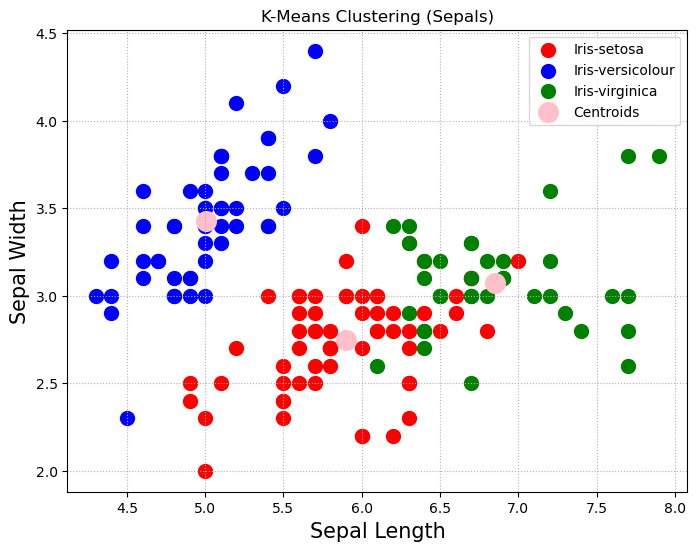

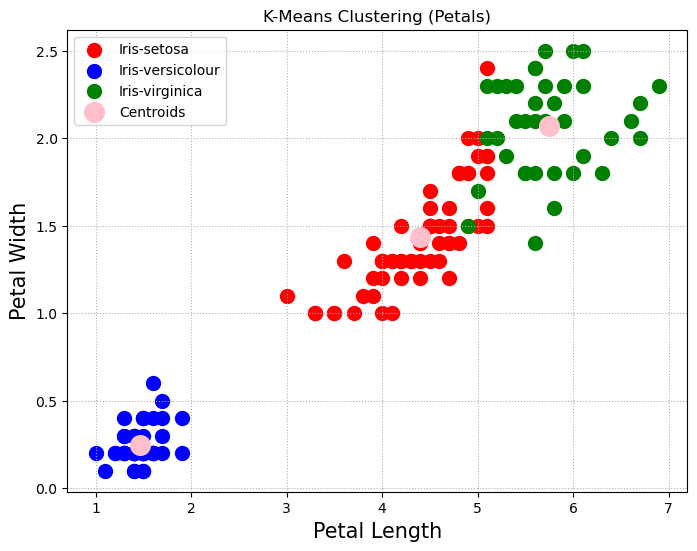

In [25]:
# From the Plot, we can observe an elbow forming at cluster # 3
#Performing k-means on cluster# 3

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data)

#defining a function to plot length and width of sepals and petals to visualize clusters

def plot_clusters(data_x, data_y, clusters, centroids, title, x_label, y_label, cluster_labels):
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green']
    
    for i in range(len(cluster_labels)):
        plt.scatter(data_x[clusters == i], data_y[clusters == i], s=100, c=colors[i], label=cluster_labels[i])
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='pink', label='Centroids')
    plt.title(title)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend()
    plt.grid(linestyle="dotted")
    plt.show()

    
# Define custom cluster colors and labels
cluster_labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

# Plot for Sepals
#Extracting coordinates of centroids using : all rows and :2 first 2 cols

plot_clusters(data['sepal length (cm)'], data['sepal width (cm)'], clusters, kmeans.cluster_centers_[:, :2], 'K-Means Clustering (Sepals)', 'Sepal Length', 'Sepal Width', cluster_labels)

# Plot for Petals
#Extracting coordinates of centroids using : all rows and 2: last 2 cols

plot_clusters(data['petal length (cm)'], data['petal width (cm)'], clusters, kmeans.cluster_centers_[:, 2:], 'K-Means Clustering (Petals)', 'Petal Length', 'Petal Width', cluster_labels)

In [32]:
# Exploratory analysis and validation

# Getting the actual clusters of flowers

actual_classes = iris.target

# Create a DataFrame to compare predicted clusters with actual classes

comparison_df = pd.DataFrame({'Predicted Cluster': clusters, 'Actual Class': actual_classes})
print(comparison_df)

# Calculate ARI and NMI

ari_score = adjusted_rand_score(actual_classes, clusters)
nmi_score = normalized_mutual_info_score(actual_classes, clusters)

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")

     Predicted Cluster  Actual Class
0                    1             0
1                    1             0
2                    1             0
3                    1             0
4                    1             0
..                 ...           ...
145                  2             2
146                  0             2
147                  2             2
148                  2             2
149                  0             2

[150 rows x 2 columns]
Adjusted Rand Index (ARI): 0.7302382722834697
Normalized Mutual Information (NMI): 0.7581756800057785


Conclusion: 

An ARI score of 0.73 suggests that there is a meaningful similarity between the clusters produced by our clustering algorithm and the actual classes of the data. The Elbow method has definitely captured some underlying structure aligning with the actual classes, indicating  a good agreement

A Normalized Mutual Information (NMI) score of 0.758 indicates a relatively strong agreement between the predicted clusters and the actual classes indicating meaningful clustering. Thus, the algorithm is a good fit
